# Wilt Data Set


This data set contains some training and testing data from a remote sensing study by Johnson et al. (2013) that involved detecting diseased trees in Quickbird imagery. There are few training samples for the 'diseased trees' class (74) and many for 'other land cover' class (4265).

The data set consists of image segments, generated by segmenting the pansharpened image. The segments contain spectral information from the Quickbird multispectral image bands and texture information from the panchromatic (Pan) image band. The testing data set is for the row with Segmentation scale 15 segments and original multi-spectral image Spectral information in Table 2 of the reference (i.e. row 5).
#### training.csv: training data set (4339 image segments)
#### testing.csv: testing data set (500 image segments)

##### class: 'w' (diseased trees), 'n' (all other land cover)
##### GLCM_Pan: GLCM mean texture (Pan band)
##### Mean_G: Mean green value
##### Mean_R: Mean red value
##### Mean_NIR: Mean NIR value
##### SD_Pan: Standard deviation (Pan band)

#### Importing required libraries : 

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from pylab import *
sns.set_style('darkgrid')

In [2]:
df=pd.read_csv('B:\\Education\\Data Scientist\\EDU_DS\\Data_sets\\Classification\\Wilt Data Set\\wilt_training.csv')
df.head()

,class,GLCM_pan,Mean_Green,Mean_Red,Mean_NIR,SD_pan
0,w,120.362774,205.500000,119.395349,416.581395,20.676318
1,w,124.739583,202.800000,115.333333,354.333333,16.707151
2,w,134.691964,199.285714,116.857143,477.857143,22.496712
3,w,127.946309,178.368421,92.368421,278.473684,14.977453
4,w,135.431548,197.000000,112.690476,532.952381,17.604193


In [3]:
df['Class']=df['class']
df.drop(columns='class',axis=1,inplace=True)
df.head()

,GLCM_pan,Mean_Green,Mean_Red,Mean_NIR,SD_pan,Class
0,120.362774,205.500000,119.395349,416.581395,20.676318,w
1,124.739583,202.800000,115.333333,354.333333,16.707151,w
2,134.691964,199.285714,116.857143,477.857143,22.496712,w
3,127.946309,178.368421,92.368421,278.473684,14.977453,w
4,135.431548,197.000000,112.690476,532.952381,17.604193,w


In [4]:
df['Class'].replace(to_replace=['w','n'], value=[1,0],inplace=True)
df.head()

,GLCM_pan,Mean_Green,Mean_Red,Mean_NIR,SD_pan,Class
0,120.362774,205.500000,119.395349,416.581395,20.676318,1
1,124.739583,202.800000,115.333333,354.333333,16.707151,1
2,134.691964,199.285714,116.857143,477.857143,22.496712,1
3,127.946309,178.368421,92.368421,278.473684,14.977453,1
4,135.431548,197.000000,112.690476,532.952381,17.604193,1


In [5]:
df.shape

(4339, 6)

In [6]:
df.corr()

,GLCM_pan,Mean_Green,Mean_Red,Mean_NIR,SD_pan,Class
GLCM_pan,1.000000,-0.122384,-0.107166,-0.094263,-0.065023,0.017804
Mean_Green,-0.122384,1.000000,0.964682,0.223518,0.246103,-0.067359
Mean_Red,-0.107166,0.964682,1.000000,0.121230,0.254383,0.001844
Mean_NIR,-0.094263,0.223518,0.121230,1.000000,0.120276,-0.099268
SD_pan,-0.065023,0.246103,0.254383,0.120276,1.000000,-0.054946
Class,0.017804,-0.067359,0.001844,-0.099268,-0.054946,1.000000


## Data Analyzing:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4339 entries, 0 to 4338
Data columns (total 6 columns):
GLCM_pan      4339 non-null float64
Mean_Green    4339 non-null float64
Mean_Red      4339 non-null float64
Mean_NIR      4339 non-null float64
SD_pan        4339 non-null float64
Class         4339 non-null int64
dtypes: float64(5), int64(1)
memory usage: 203.5 KB


In [8]:
df.describe()

,GLCM_pan,Mean_Green,Mean_Red,Mean_NIR,SD_pan,Class
count,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000
mean,126.831298,233.906908,117.292439,534.104683,24.924588,0.017055
std,13.735836,60.757687,60.711159,154.495500,11.008303,0.129490
min,0.000000,164.625000,59.142857,86.500000,0.000000,0.000000
25%,118.589080,206.000000,91.975244,422.875000,18.009143,0.000000
50%,127.479167,221.454545,101.727273,528.500000,23.612444,0.000000
75%,135.043591,241.791304,116.866071,643.087037,29.899148,0.000000
max,183.281250,955.714286,746.333333,1005.516129,156.508431,1.000000


In [9]:
df.isnull().sum()

GLCM_pan      0
Mean_Green    0
Mean_Red      0
Mean_NIR      0
SD_pan        0
Class         0
dtype: int64

In [10]:
df.isna().sum()

GLCM_pan      0
Mean_Green    0
Mean_Red      0
Mean_NIR      0
SD_pan        0
Class         0
dtype: int64

In [11]:
pd.DataFrame(df['Class'].value_counts())

,Class
0,4265
1,74


##### '1' (diseased trees), '0' (all other land cover)

In [12]:
GLCM=df.GLCM_pan.values
Green=df.Mean_Green.values
Red=df.Mean_Red.values
NIR=df.Mean_NIR.values
pan=df.SD_pan.values

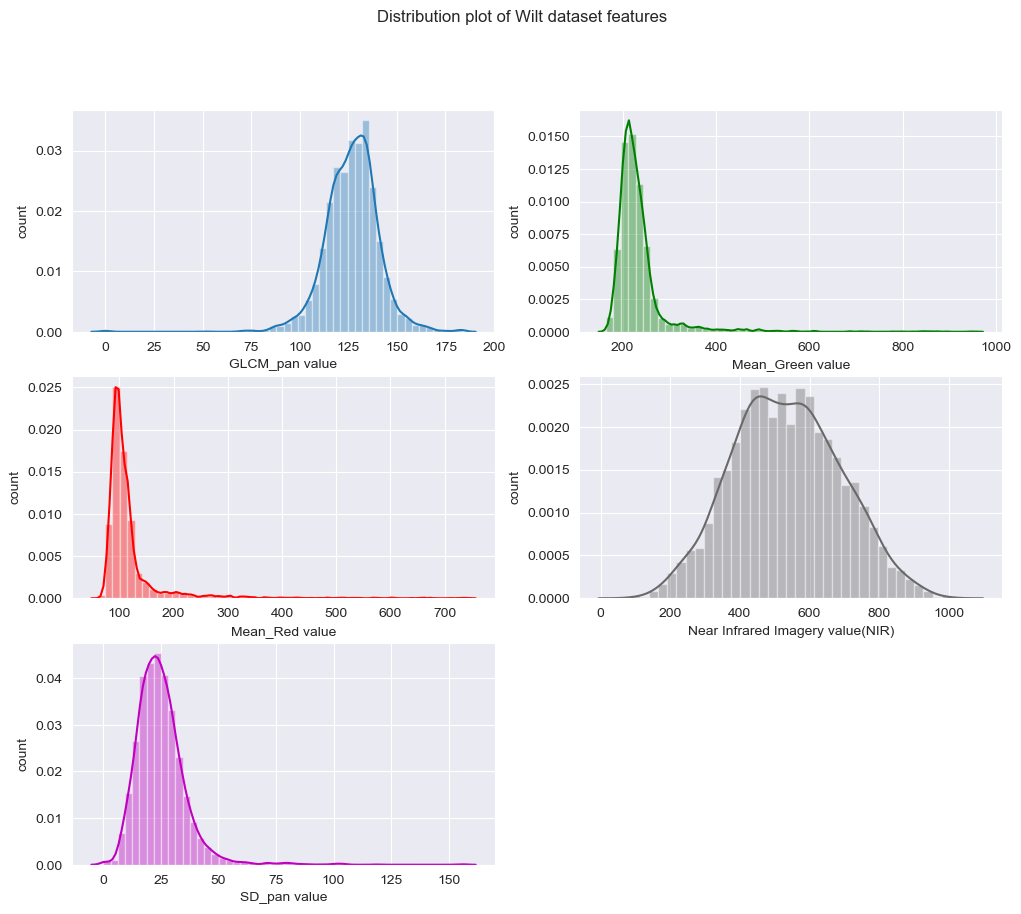

In [50]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,10),dpi=100)
plt.suptitle('Distribution plot of Wilt dataset features')


plt.subplot(3,2,1)
sns.distplot(GLCM)
plt.xlabel('GLCM_pan value')
plt.ylabel('count')

plt.subplot(3,2,2)
sns.distplot(Green,color='green')
plt.xlabel('Mean_Green value')
plt.ylabel('count')

plt.subplot(3,2,3)
sns.distplot(Red,color='red')
plt.xlabel('Mean_Red value')
plt.ylabel('count')

plt.subplot(3,2,4)
sns.distplot(NIR,color='dimgray')
plt.xlabel('Near Infrared Imagery value(NIR)')
plt.ylabel('count')

plt.subplot(3,2,5)
sns.distplot(pan,color='m')
plt.xlabel('SD_pan value')
plt.ylabel('count');


### log transformation to have a better  distribution

In [53]:
df['Mean_Green_log'] = np.log(df['Mean_Green'])
df['Mean_Red_log'] = np.log(df['Mean_Red'])

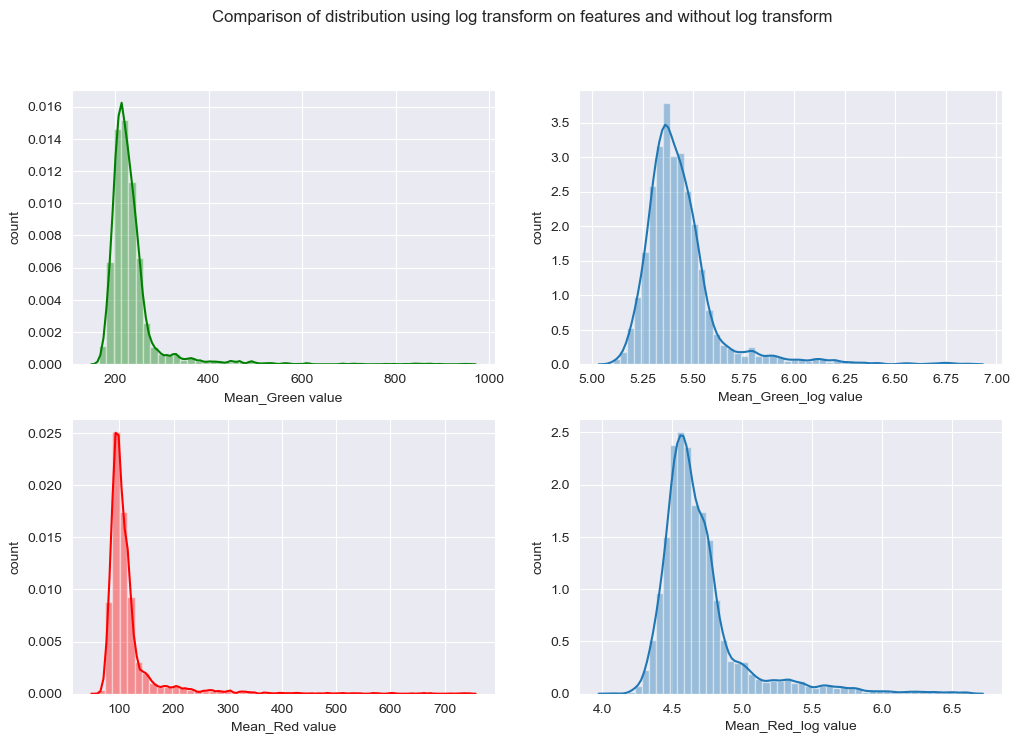

In [57]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8),dpi=100)
plt.suptitle('Comparison of distribution using log transform on features and without log transform')

plt.subplot(2,2,1)
sns.distplot(Green,color='green')
plt.xlabel('Mean_Green value')
plt.ylabel('count')

plt.subplot(2,2,2)
sns.distplot( df['Mean_Green_log'])
plt.xlabel('Mean_Green_log value')
plt.ylabel('count')

plt.subplot(2,2,3)
sns.distplot(Red,color='red')
plt.xlabel('Mean_Red value')
plt.ylabel('count')

plt.subplot(2,2,4)
sns.distplot(df['Mean_Red_log'],)
plt.xlabel('Mean_Red_log value')
plt.ylabel('count');

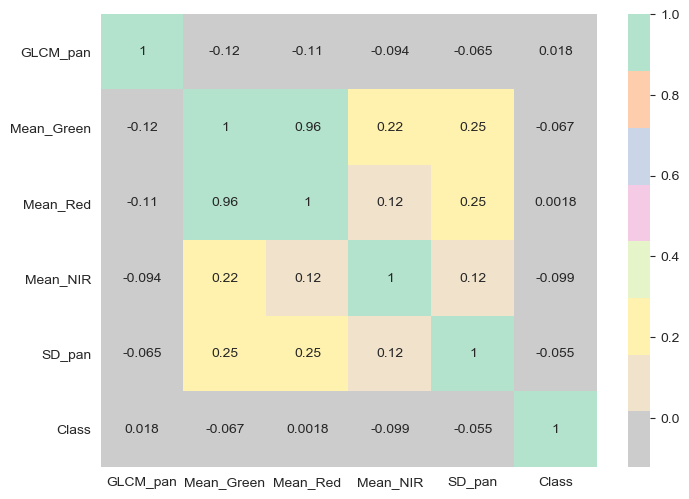

In [14]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,6),dpi=100)
sns.heatmap(df.corr(),cmap='Pastel2_r',annot=True);